In [1]:
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# samples & randon seed for generating data

SAMPLES = 1000


SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
x_values = np.random.uniform(low=0, high = 2 * math.pi, size = SAMPLES)
np.random.shuffle(x_values)

In [4]:
y_values = np.sin(x_values)

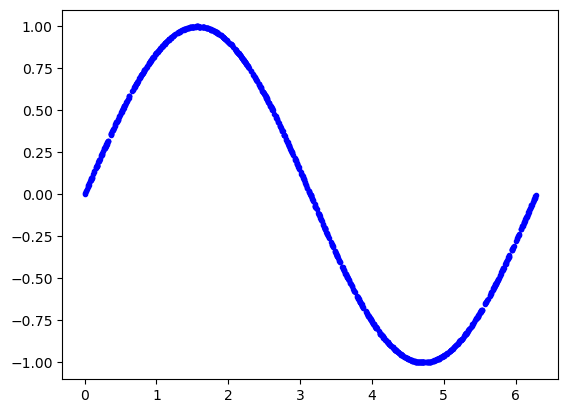

In [5]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b.')
plt.show()

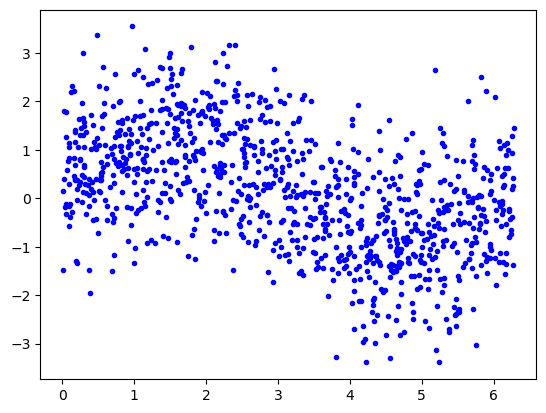

In [6]:
# add noise

y_values += 0.1 + np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

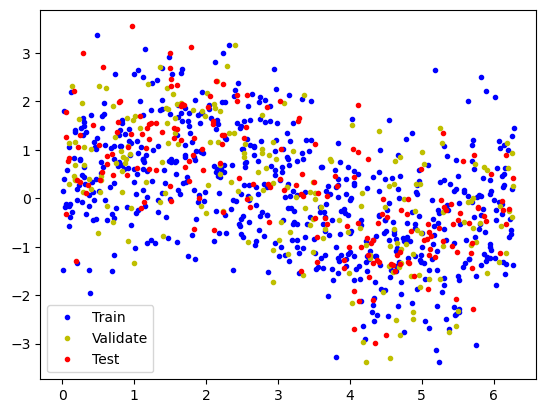

In [7]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

## ML Model

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1))

In [9]:
model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs= 600, validation_data = (x_validate, y_validate))

Epoch 1/600
19/19 [==============================] - 1s 15ms/step - loss: 1.6195 - mae: 1.0197 - val_loss: 1.6027 - val_mae: 1.0315
Epoch 2/600
19/19 [==============================] - 0s 4ms/step - loss: 1.4232 - mae: 0.9622 - val_loss: 1.5565 - val_mae: 1.0089
Epoch 3/600
19/19 [==============================] - 0s 4ms/step - loss: 1.3985 - mae: 0.9561 - val_loss: 1.5269 - val_mae: 1.0003
Epoch 4/600
19/19 [==============================] - 0s 4ms/step - loss: 1.3776 - mae: 0.9481 - val_loss: 1.4950 - val_mae: 0.9855
Epoch 5/600
19/19 [==============================] - 0s 4ms/step - loss: 1.3539 - mae: 0.9413 - val_loss: 1.4658 - val_mae: 0.9755
Epoch 6/600
19/19 [==============================] - 0s 4ms/step - loss: 1.3374 - mae: 0.9353 - val_loss: 1.4434 - val_mae: 0.9701
Epoch 7/600
19/19 [==============================] - 0s 4ms/step - loss: 1.3173 - mae: 0.9274 - val_loss: 1.4179 - val_mae: 0.9563
Epoch 8/600
19/19 [==============================] - 0s 3ms/step - loss: 1.3033 - 

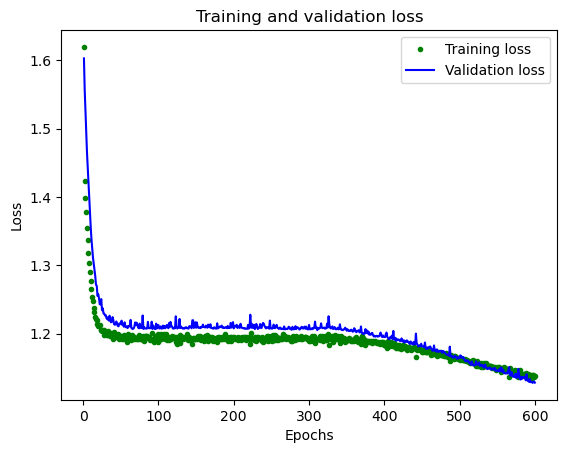

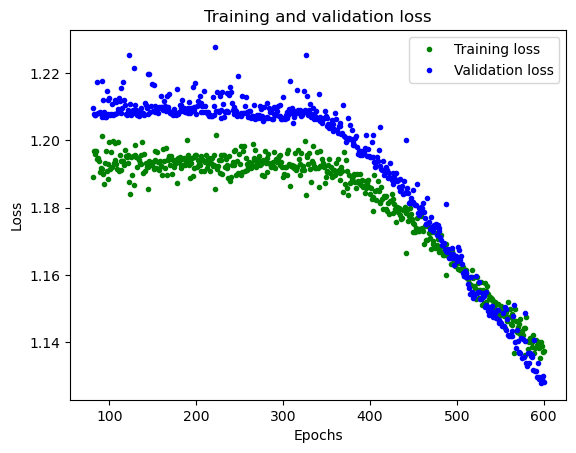

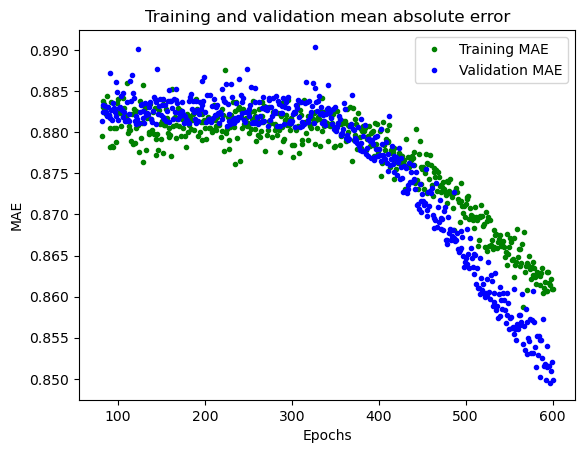

In [11]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 80

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Evaluate the model

In [12]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.9525 - mae: 0.7714


[0.9524936079978943, 0.7713984847068787]

7/7 [==============================] - 0s 2ms/step


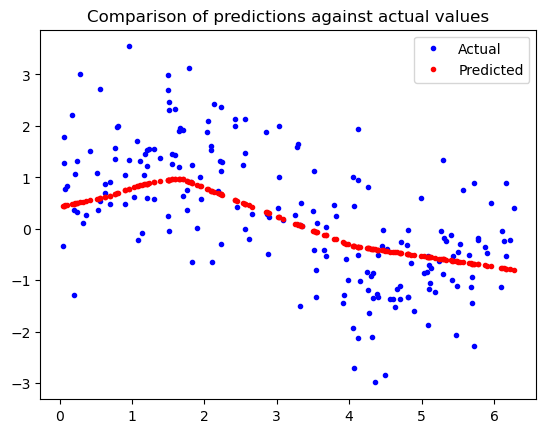

In [13]:
predictions = model.predict(x_test)

# make a plot of predictions against y_test

plt.title("Comparison of predictions against actual values")
plt.plot(x_test, y_test, 'b.', label="Actual")
plt.plot(x_test, predictions, "r.", label = "Predicted")
plt.legend()
plt.show()

## Convert to TensorFlow Lite

In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]


# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

In [15]:
tflite_model = converter.convert()

# save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32


3024

## Test the converted model

In [16]:
# instantiate an interpreter

sine_model = tf.lite.Interpreter('sine_model.tflite')


# allocate memory 
sine_model.allocate_tensors()

# get index of input and output tensors/
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [17]:
# Create arrays to store the results
sine_model_predictions = []

In [18]:
# run the model interpreter for the model

for x_value in x_test:
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype= np.float32) # convert to 2D tensor
    sine_model.set_tensor(sine_model_input_index, x_value_tensor) # write tensor to model
    sine_model.invoke() # run inference
    sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

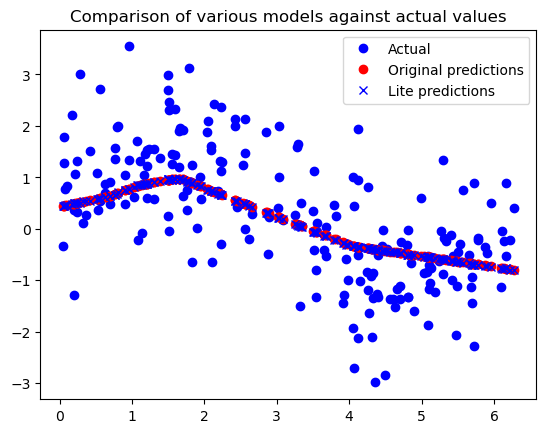

In [19]:
# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.legend()
plt.show()

## Write to a C file

In [20]:
# Install xxd if it is not available
!apt-get -qq install xxd

# Save the file as a C source file
!xxd -i sine_model.tflite > sine_model.cc

# Print the source file
!cat sine_model.cc

unsigned char sine_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x84, 0x00, 0x00, 0x00, 0xdc, 0x00, 0x00, 0x00,
  0xa8, 0x03, 0x00, 0x00, 0xb8, 0x03, 0x00, 0x00, 0x44, 0x0b, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x06, 0xfc, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x98, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00,
  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x32, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xda, 0xfc, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,


## References

1. [Tensorflow's Hello World Example](https://github.com/tensorflow/tensorflow/blob/be4f6874533d78f662d9777b66abe3cdde98f901/tensorflow/lite/experimental/micro/examples/hello_world/create_sine_model.ipynb)